# Neural Network to convert Celsius degrees to Fahrenheit degrees

## Importing the libraries

In [13]:
# biblioteca de código abierto para aprendizaje automático y redes neuronales
import tensorflow as tf
# Biblioteca para manejo de matrices y vectores, junto con una gran colección de funciones matemáticas de alto nivel para operar con ellas.
import numpy as np
# Biblioteca para graficar
import matplotlib.pyplot as plt
# biblioteca para ignorar los warnings
import warnings
warnings.filterwarnings('ignore')

## Data

In [9]:
# valores de entrada
celsius = np.array([-40, -10, 0, 8, 15, 22, 38], dtype=float)
# valores de salida
fahrenheit = np.array([-40, 14, 32, 46, 59, 72, 100], dtype=float)

## Neural Network Model
Además de utilizar tensorflow, se utilizará la librería keras para crear el modelo de la red neuronal, ya que es más sencillo y rápido de implementar.

In [10]:
# Neural Layers
#? Capa de tipo Dense. Está completamente conectada, donde cada nodo de entrada se conecta a cada nodo de salida.
layer = tf.keras.layers.Dense(units=1, input_shape=[1]) #¡ 1 unidad en la capa de salida, 1 entrada

#? Modelo de tipo secuencial. Es una pila lineal de capas.
model = tf.keras.Sequential([layer])

In [11]:
# Configuración el modelo para el entrenamiento.
model.compile(
    #? Función de pérdida. Mide qué tan lejos está la salida del modelo de la salida deseada.
    loss='mean_squared_error', #¡ Poca cantidad de errores grandes es peor que una gran cantidad de errores pequeños.
    #? Optimizador. Es cómo el modelo se actualiza en función de los datos que ve y su función de pérdida.
    optimizer=tf.keras.optimizers.Adam(0.1) #¡ 0.1 es el tamaño del paso.
)

### Training

In [12]:
# Entrenamiento del modelo.
print('Entrenando...')
#? fit() es el método que realiza el entrenamiento.
history = model.fit(celsius, fahrenheit, epochs=1000, verbose=False) #¡ epochs es la cantidad de veces que el modelo verá el mismo dato.
print('Modelo entrenado!')

Entrenando...
Modelo entrenado.


### Loss function
La función de pérdida es la que se encarga de medir el error entre la salida de la red y el valor esperado. En este caso, se utilizará la función de pérdida de error cuadrático medio (MSE).

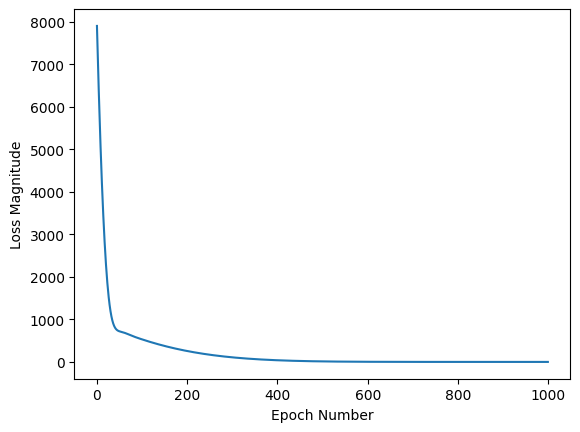

In [14]:
# Graficar el error
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

---

**Comentarios**

---

Podemos ver que en realidad no eran necesarias tantas iteraciones para entrenar la red neuronal, ya que con 500 iteraciones ya se obtiene un error muy bajo, luego de 600 iteraciones el error no disminuye mucho más.

### Testing

In [15]:
print('Hagamos una predicción!')
resultado = model.predict([100.0]) #¡ 100 grados celsius
print(f'El resultado es {resultado} fahrenheit!')

Hagamos una predicción!
1/1 [==============================] - 0s 80ms/step
El resultado es [[211.74028]] fahrenheit!


---

**Comentarios**

---

El error obtenido en el conjunto de prueba es muy bajo, lo que indica que la red neuronal está funcionando correctamente. 100 grados Celsius son 212 grados Fahrenheit, y la red neuronal predice 211.7 grados Fahrenheit, lo que es muy cercano al valor real.

### Internal variables

In [16]:
print('Variables internas del modelo')
print(f'Variables: {layer.get_weights()}')

Variables internas del modelo
Variables: [array([[1.798419]], dtype=float32), array([31.898382], dtype=float32)]


---

**Interpretación**

---

El peso asignado a la entrada es 1.79 y el sesgo es 31.89. La salida de la red neuronal es la suma de la entrada multiplicada por el peso y el sesgo. En este caso, la salida es 1.79 * 100 + 31.89 = 211.9 grados Fahrenheit, lo que es muy cercano al valor real.
Tambien podemos ver que la formula utilizada por la red neuronal es bastante similar a la formula para convertir grados Celsius a grados Fahrenheit, que es F = 1.8 * C + 32.

## Conclusiones

La red neuronal funciona correctamente, ya que el error obtenido en el conjunto de prueba es muy bajo. Además, la red neuronal utiliza una formula muy similar a la formula para convertir grados Celsius a grados Fahrenheit, lo que indica que la red neuronal aprendió correctamente la relación entre las variables de entrada y la variable de salida.
Ahora bien, la formula para convertir grados Celsius a grados Fahrenheit es muy simple, en sí es una función lineal. Un problema más complejo sería no podría ser resulto con una red neuronal tan simple como la utilizada en este ejemplo. Para resolver problemas más complejos, se necesitaría una red neuronal con más capas ocultas y más neuronas por capa oculta.